In [1]:
# Dependencies
import pandas as pd

In [2]:
# Merging csv files (without repeating header)
df = pd.read_csv('CleanData/Flights10percent.csv')
df.head(5)

,1,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,DAY_OF_WEEK,DEP_DELAY,DEP_DELAY_NEW,DEP_TIME,DEST,DEST_AIRPORT_ID,DEST_CITY_NAME,DEST_STATE_NM,FL_DATE,OP_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_NM
0,2566086,-11,0,1312,3,0,0,12,MIA,13303,"Miami, FL",Florida,1/10/18,2292,AA,TPA,15304,"Tampa, FL",Florida
1,5985996,3,3,2123,1,1,24,18,MCO,13204,"Orlando, FL",Florida,10/29/18,2473,WN,AUS,10423,"Austin, TX",Texas
2,1503516,17,17,1447,4,1,17,13,SGF,14783,"Springfield, MO",Missouri,12/27/18,806,G4,PIE,14112,"St. Petersburg, FL",Florida
3,4372872,2,2,2117,4,1,2,20,DEN,11292,"Denver, CO",Colorado,3/8/18,1364,WN,OKC,13851,"Oklahoma City, OK",Oklahoma
4,1302164,60,60,1837,1,1,52,16,SEA,14747,"Seattle, WA",Washington,12/3/18,1347,AS,SFO,14771,"San Francisco, CA",California


In [3]:
df.columns

Index(['1', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_TIME', 'DAY_OF_WEEK',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_TIME', 'DEST', 'DEST_AIRPORT_ID',
       'DEST_CITY_NAME', 'DEST_STATE_NM', 'FL_DATE', 'OP_CARRIER_FL_NUM',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_NM'],
      dtype='object')

In [4]:
df.shape

(712491, 19)

In [6]:
dep_delay_data = df.drop(columns =[ '1',
                                       'OP_UNIQUE_CARRIER',
                                       'OP_CARRIER_FL_NUM', 
                                       'ORIGIN_AIRPORT_ID', 
                                       'ORIGIN_CITY_NAME',
                                       'ORIGIN_STATE_NM', 
                                       'DEST_AIRPORT_ID', 
                                       'DEST_CITY_NAME',
                                       'DEST_STATE_NM', 
                                       'DEP_DELAY_NEW', 
                                       'ARR_TIME',
                                       'ARR_DELAY', 
                                       'ARR_DELAY_NEW'])
dep_delay_data.head()

,DAY_OF_WEEK,DEP_DELAY,DEP_TIME,DEST,FL_DATE,ORIGIN
0,3,0,12,MIA,1/10/18,TPA
1,1,1,18,MCO,10/29/18,AUS
2,4,1,13,SGF,12/27/18,PIE
3,4,1,20,DEN,3/8/18,OKC
4,1,1,16,SEA,12/3/18,SFO


In [7]:
#dep_delay_data['FL_DATE'].dt.strftime("%m/%d/%Y").astype(int)

# dep_delay_data["FL_DATE"] = pd.to_datetime(dep_delay_data["FL_DATE"]).dt.strftime("%m/%d/%Y")

In [8]:
# import math

# for index, row in dep_delay_data.iterrows():
#     dep_delay_data.loc[index, 'DEP_TIME'] = math.floor(row['DEP_TIME'] / 100)
# dep_delay_data.head()
dep_delay_data.head(5)

,DAY_OF_WEEK,DEP_DELAY,DEP_TIME,DEST,FL_DATE,ORIGIN
0,3,0,12,MIA,01/10/2018,TPA
1,1,1,18,MCO,10/29/2018,AUS
2,4,1,13,SGF,12/27/2018,PIE
3,4,1,20,DEN,03/08/2018,OKC
4,1,1,16,SEA,12/03/2018,SFO


In [10]:
dep_delay_data["datetime"] = pd.to_datetime(dep_delay_data['FL_DATE'])


In [11]:
dep_delay_data['day'] = dep_delay_data['datetime'].dt.day
dep_delay_data['month'] = dep_delay_data['datetime'].dt.month
dep_delay_data['year'] = dep_delay_data['datetime'].dt.year
dep_delay_data.head()

,DAY_OF_WEEK,DEP_DELAY,DEP_TIME,DEST,FL_DATE,ORIGIN,datetime,day,month,year
0,3,0,12,MIA,01/10/2018,TPA,2018-01-10,10,1,2018
1,1,1,18,MCO,10/29/2018,AUS,2018-10-29,29,10,2018
2,4,1,13,SGF,12/27/2018,PIE,2018-12-27,27,12,2018
3,4,1,20,DEN,03/08/2018,OKC,2018-03-08,8,3,2018
4,1,1,16,SEA,12/03/2018,SFO,2018-12-03,3,12,2018


In [12]:
dep_delay_data = dep_delay_data.drop(columns =[ 'FL_DATE','datetime','year'])

In [13]:

dep_delay_data.head()

,DAY_OF_WEEK,DEP_DELAY,DEP_TIME,DEST,ORIGIN,day,month
0,3,0,12,MIA,TPA,10,1
1,1,1,18,MCO,AUS,29,10
2,4,1,13,SGF,PIE,27,12
3,4,1,20,DEN,OKC,8,3
4,1,1,16,SEA,SFO,3,12


In [14]:
dep_delay_data.shape

(712491, 7)

In [15]:
dep_delay_data = pd.get_dummies(dep_delay_data, columns=['ORIGIN', 'DEST'])

In [41]:
 dep_delay_data.to_csv("CleanData/flight_prediction_dummies.csv")

In [16]:
dep_delay_data.shape

(712491, 719)

In [36]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(dep_delay_data.drop('DEP_DELAY', axis=1),dep_delay_data['DEP_DELAY'], test_size=0.1, random_state=42)

In [37]:
train_x.shape

(641241, 718)

In [38]:
test_x.shape

(71250, 718)

In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)  
model.fit(train_x, train_y)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [60]:
import pickle
# save the model to disk
filename = 'model/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [40]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.6663438596491228

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[70125, 14702],
       [33118, 24554]])

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [85]:
airport_ids = pd.read_csv('CleanData/airport_id.csv',header = None)

In [131]:
def ontime (departure_date_time, origin, destination):
    from datetime import datetime
    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour
    
#     user_input = ('17/1/2020', 'SFO', 'IAD')
    origin = origin.upper()
    destination = destination.upper()
    
    aids = airport_ids[0].tolist()
    d = {'month': [month],'day': [day],'DAY_OF_WEEK': [day_of_week],'DEP_TIME': [hour]}
    for atype in ["ORIGIN","DEST"]:
        for aid in aids:
            d[atype + "_" + aid] = [0]
    d["ORIGIN" + "_" + origin] = [1]
    d["DEST" + "_" + destination] = [1]
    return(d)
#     return(model.predict_proba(pd.DataFrame(d))[0][0])

In [126]:
ontime('17/1/2020', 'SFO', 'IAD')
# model.predict_proba(pd.DataFrame(input))[0][0]

{'month': [1],
 'day': [17],
 'DAY_OF_WEEK': [5],
 'DEP_TIME': [0],
 'ORIGIN_SUN': [0],
 'ORIGIN_SAT': [0],
 'ORIGIN_JAN': [0],
 'ORIGIN_ABE': [0],
 'ORIGIN_ABI': [0],
 'ORIGIN_ABQ': [0],
 'ORIGIN_ABR': [0],
 'ORIGIN_ABY': [0],
 'ORIGIN_ACK': [0],
 'ORIGIN_ACT': [0],
 'ORIGIN_ACV': [0],
 'ORIGIN_ACY': [0],
 'ORIGIN_ADK': [0],
 'ORIGIN_ADQ': [0],
 'ORIGIN_AEX': [0],
 'ORIGIN_AGS': [0],
 'ORIGIN_AKN': [0],
 'ORIGIN_ALB': [0],
 'ORIGIN_ALO': [0],
 'ORIGIN_AMA': [0],
 'ORIGIN_ANC': [0],
 'ORIGIN_APN': [0],
 'ORIGIN_ART': [0],
 'ORIGIN_ASE': [0],
 'ORIGIN_ATL': [0],
 'ORIGIN_ATW': [0],
 'ORIGIN_AUS': [0],
 'ORIGIN_AVL': [0],
 'ORIGIN_AVP': [0],
 'ORIGIN_AZA': [0],
 'ORIGIN_AZO': [0],
 'ORIGIN_BDL': [0],
 'ORIGIN_BET': [0],
 'ORIGIN_BFF': [0],
 'ORIGIN_BFL': [0],
 'ORIGIN_BGM': [0],
 'ORIGIN_BGR': [0],
 'ORIGIN_BHM': [0],
 'ORIGIN_BIL': [0],
 'ORIGIN_BIS': [0],
 'ORIGIN_BJI': [0],
 'ORIGIN_BKG': [0],
 'ORIGIN_BLI': [0],
 'ORIGIN_BLV': [0],
 'ORIGIN_BMI': [0],
 'ORIGIN_BNA': [0],
 'ORIGIN_BOI

In [94]:
user_input = ('17/1/2020', 'SFO', 'IAD')

aids = airport_ids[0].tolist()
d = {'month': 1,'day': 2,'DAY_OF_WEEK': 3,'DEP_TIME': 4,}
for atype in ["ORIGIN","DEST"]:
    for aid in aids:
        d[atype + "_" + aid] = 0
d["ORIGIN" + "_" + user_input[1]] = 1
d["DEST" + "_" + user_input[2]] = 1
d

{'month': 1,
 'day': 2,
 'DAY_OF_WEEK': 3,
 'DEP_TIME': 4,
 'ORIGIN_SUN': 0,
 'ORIGIN_SAT': 0,
 'ORIGIN_JAN': 0,
 'ORIGIN_ABE': 0,
 'ORIGIN_ABI': 0,
 'ORIGIN_ABQ': 0,
 'ORIGIN_ABR': 0,
 'ORIGIN_ABY': 0,
 'ORIGIN_ACK': 0,
 'ORIGIN_ACT': 0,
 'ORIGIN_ACV': 0,
 'ORIGIN_ACY': 0,
 'ORIGIN_ADK': 0,
 'ORIGIN_ADQ': 0,
 'ORIGIN_AEX': 0,
 'ORIGIN_AGS': 0,
 'ORIGIN_AKN': 0,
 'ORIGIN_ALB': 0,
 'ORIGIN_ALO': 0,
 'ORIGIN_AMA': 0,
 'ORIGIN_ANC': 0,
 'ORIGIN_APN': 0,
 'ORIGIN_ART': 0,
 'ORIGIN_ASE': 0,
 'ORIGIN_ATL': 0,
 'ORIGIN_ATW': 0,
 'ORIGIN_AUS': 0,
 'ORIGIN_AVL': 0,
 'ORIGIN_AVP': 0,
 'ORIGIN_AZA': 0,
 'ORIGIN_AZO': 0,
 'ORIGIN_BDL': 0,
 'ORIGIN_BET': 0,
 'ORIGIN_BFF': 0,
 'ORIGIN_BFL': 0,
 'ORIGIN_BGM': 0,
 'ORIGIN_BGR': 0,
 'ORIGIN_BHM': 0,
 'ORIGIN_BIL': 0,
 'ORIGIN_BIS': 0,
 'ORIGIN_BJI': 0,
 'ORIGIN_BKG': 0,
 'ORIGIN_BLI': 0,
 'ORIGIN_BLV': 0,
 'ORIGIN_BMI': 0,
 'ORIGIN_BNA': 0,
 'ORIGIN_BOI': 0,
 'ORIGIN_BOS': 0,
 'ORIGIN_BPT': 0,
 'ORIGIN_BQK': 0,
 'ORIGIN_BQN': 0,
 'ORIGIN_BRD': 0,
 'ORI

In [65]:
user_input = 

{'month': 1,
 'day': 1,
 'DAY_OF_WEEK': 2,
 'DEP_TIME': 3,
 'ORIGIN': 4,
 'DEST': 'DEST_5'}

In [79]:
d = {}
for x in ["ORIGIN_1","ORIGIN_2","ORIGIN_3","DEST_1","DEST_2"]:
    d[x] = 0
user_input = {"ORIGIN":"1","DEST":"2"}


d["ORIGIN" + "_" + user_input["ORIGIN"]] = 1
d["DEST" + "_" + user_input["DEST"]] = 1
d

{'ORIGIN_1': 1, 'ORIGIN_2': 0, 'ORIGIN_3': 0, 'DEST_1': 0, 'DEST_2': 1}

In [71]:
"ORIGIN_ABC"[-3:]

'ABC'

In [ ]:
{"ORIGIN_1":0,"ORIGIN_2":1,"ORIGIN_2":0}

In [124]:
ontime_departure('17/1/2020', 'SFO', 'IAD')

0.5

In [54]:
ontime_departure('18/10/2020', 'YUM', 'SFO')

0.6

In [55]:
ontime_departure('31/12/2020', 'SFO', 'LAX')

0.7

(0.0, 1.0)

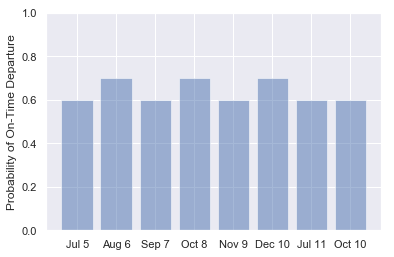

In [59]:
import numpy as np

labels = ('Jul 5', 'Aug 6', 'Sep 7', 'Oct 8', 'Nov 9', 'Dec 10', 'Jul 11', 'Oct 10')
values = (ontime_departure('5/07/2020', 'SFO', 'LAX'),
          ontime_departure('6/08/2020', 'SFO', 'LAX'),
          ontime_departure('7/09/2020', 'SFO', 'LAX'),
          ontime_departure('8/10/2020', 'SFO', 'LAX'),
          ontime_departure('9/11/2020', 'SFO', 'LAX'),
          ontime_departure('10/12/2020', 'SFO', 'LAX'),
          ontime_departure('11/07/2020', 'SFO', 'LAX'),
          ontime_departure('10/10/2020', 'SFO', 'LAX'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Departure')
plt.ylim((0.0, 1.0))